# 평가 지표 : AUC


https://bskyvision.com/1165

`이진 분류기(binary classifier)`는 양성과 음성, 1과 0, +와 -, 앞과 뒤와 같이 두 가지의 클래스를 분류할 수 있는 분류기를 뜻합니다. 이진 분류기의 성능을 평가하는데 사용되는 것 중 하나가 AUC입니다.  

- AUC가  0.8 이상이면 아주 훌륭한 성능을 가진 이진분류기라고 평가된다.  
0.7 ~ 0.8 : 좋은 상태  
0.5 ~ 0.7 : 도움이 되는 상태  
0.5 이하 : 쓰레기  

- TPR 
  - 전체 양성 샘플 중에 양성으로 예측된 것의 비율
  - 1에 가까울 수록 좋다

- FPR
  - 전체 음성 샘플 중에 양성으로 잘못 예측된 것의 비율
  - 0에 가까울수록 좋다

- decision threshold
  - 0 ~ 1 사이의 값 중 기준값 이상일 때 양성으로 판정을 내리게 된다. 그 때 기준값이 decision threshold이다
  - decision threshold가 0 이면 무조건 양성, 1 이면 무조건 음성이 나오게 된다
  - 기준을 0,0.1,0.2 ... 0.9,1 바꿔가면서 TPR, FPR을 기록해보자

  

# 기본세팅

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터 로드

In [2]:
train = pd.read_csv("/content/drive/MyDrive/github/타이타닉/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/github/타이타닉/data/test.csv")

# EDA & 전처리

## 상관계수 기반 데이터 활용 방식

object 타입의 컬럼을 제거 및 치환해서 사용

## info()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## describe()

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## ~PassengerId(제거)~

### 제거 사유 : 전부 다 다른값으로 공통점 찾기 어려움

In [7]:
train['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

- 전부 다 다른값으로 공통점 찾기 어려움 -> `제거`

In [8]:
del train['PassengerId']
del test['PassengerId']

## Survived(target)

### 0, 1 비율 확인

#### 6:4 비율(샘플링 기법 필요x)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
len(train[train['Survived']==0]) / len(train['Survived'])

0.6161616161616161

([<matplotlib.patches.Wedge at 0x7f8011bb5790>,
 [Text(-0.39257493509945834, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.2141317827815227, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

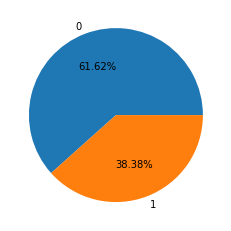

In [11]:
plt.pie(
    [
     len(train[train['Survived']==0]) / len(train['Survived']), 
     len(train[train['Survived']==1]) / len(train['Survived'])
    ],
    labels=['0','1'],
    autopct='%.2f%%'
)

- 0 과 1 비율이 큰 차이가 없음 -> `오버,다운샘플링 기법 사용 안함 `

## Pclass

In [12]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- 뭐 건들게 없네...ㅎ

## ~Name(제거)~

#### 제거 사유 : 이름에 따라 살고죽으면 억울

In [13]:
train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

- 이름에 따라 죽고 살고하면 억울하니까 ->  `제거한다`

In [14]:
del train['Name']
del test['Name']

## Sex 

### 타입변경(object -> int64)

In [15]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- 타입변경(object -> int64)

In [16]:
train['Sex'] = train['Sex'].replace('male',0)
train['Sex'] = train['Sex'].replace('female',1)

test['Sex'] = test['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('female',1)

## Age

### 결측치

In [17]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [18]:
# 결측치 확인
train['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [19]:
# 결측치 비율 확인 
len(train[train['Age'].isna()==True]) / len(train)

0.19865319865319866

#### interpolate(보간법) 사용

- 19% 결측치가 존재 -> `interplate (보간법) 사용`

In [20]:
# 보간법을 이용한 결측치 채우기 
# https://www.delftstack.com/ko/api/python-pandas/pandas-dataframe-dataframe.interpolate-function/
train['Age'] = train['Age'].interpolate()
test['Age'] = test['Age'].interpolate()

## SibSp

In [21]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- 일단 보류

## Parch

In [22]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- 일단 보류

## ~Ticket(제거)~

#### 제거 사유 : 티켓종류 약 680개이며, 정리가 되어잇지 않음

In [23]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- 티켓의 종류가 약 680개 정도이며, 한 눈에 보기 쉽게 정리되어 있지 않다. -> `제거 한다`

In [24]:
del train['Ticket']
del test['Ticket']

## Fare

In [25]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

- 일단 보류

## ~Cabin(제거)~

### 제거 사유 : 결측치가 77% 

In [26]:
train['Cabin'].isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [27]:
len(train[train['Cabin'].isna() == True]) / len(train)

0.7710437710437711

- 결측치가 너무 많음(77%) -> 컬럼 제거 

In [28]:
del train['Cabin']
del test['Cabin']

## Embarked

### 결측치 

In [29]:
# 결측치 2개 있음 -> 제거 
train['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [30]:
train = train.dropna(subset=['Embarked'])
test = test.dropna(subset=['Embarked'])

### 치환


In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- S, Q, C : 3개 존재 
- S -> 2 , Q -> 1 , C -> 0 치환

In [32]:
# 내방식
train['Embarked'] = train['Embarked'].replace('S',2)
train['Embarked'] = train['Embarked'].replace('C',1)
train['Embarked'] = train['Embarked'].replace('Q',0)

test['Embarked'] = test['Embarked'].replace('S',2)
test['Embarked'] = test['Embarked'].replace('C',1)
test['Embarked'] = test['Embarked'].replace('Q',0)
# 다른 방식
# train['Embarked'] = train['Embarked'].map({'S':2,'C':1,"Q":0})
# test['Embarked'] = test['Embarked'].map({'S':2,'C':1,"Q":0})

In [33]:
train['Embarked'] = train['Embarked'].astype(int)
test['Embarked'] = test['Embarked'].astype(int)

## 상관계수

In [34]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,0.541585,-0.066659,-0.034040,0.083151,0.255290,-0.108669
Pclass,-0.335549,1.000000,-0.127741,-0.301600,0.081656,0.016824,-0.548193,-0.043835
Sex,0.541585,-0.127741,1.000000,-0.066133,0.116348,0.247508,0.179958,-0.118593
Age,-0.066659,-0.301600,-0.066133,1.000000,-0.212594,-0.169047,0.084320,-0.028519
SibSp,-0.034040,0.081656,0.116348,-0.212594,1.000000,0.414542,0.160887,0.060606
Parch,0.083151,0.016824,0.247508,-0.169047,0.414542,1.000000,0.217532,0.079320
Fare,0.255290,-0.548193,0.179958,0.084320,0.160887,0.217532,1.000000,-0.063462
Embarked,-0.108669,-0.043835,-0.118593,-0.028519,0.060606,0.079320,-0.063462,1.000000


In [35]:
train.corr()['Survived'].abs().sort_values(ascending=False).to_frame()

,Survived
Survived,1.000000
Sex,0.541585
Pclass,0.335549
Fare,0.255290
Embarked,0.108669
Parch,0.083151
Age,0.066659
SibSp,0.034040


# 모델링

## 정규화 & 표준화

- 특이사항
  - Age 
    - 범위 : 0.42 ~ 80 (넒음)
  - Fare 
    - 범위 : 0 ~ 512 (넒음)
  - SibSp
    - 편차가 심하다 ( 0,1 이 높음)
  - Parch
    - 편차가 심하다 ( 0,1 이 높음)
- 사용
  1. 정규화(MinMaxScaler) : 상대적 크기 최소화 , -1 ~ 1 사이의 값으로 변환
  2. 표준화(StandardScaler) : 이상치 제거 , 평균이 0이고, 표준편차가 1인 값으로 변환
  3. 표준화 후 정규화

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # SVC: Support Vector Classification
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [37]:
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.preprocessing import MinMaxScaler # 정규화

def standardization(df): # 표준화
  df_s = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].copy()
  ss = StandardScaler()
  ss.fit(df_s)
  df_s2 = ss.transform(df_s)
  df_s3 = pd.DataFrame(data=df_s2,columns=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].columns)
  
  if "Survived" in df.columns :
    df_s3["Survived"] = df['Survived']
  return df_s3

def normalization(df):# 정규화
  df_n = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].copy() 

  mms = MinMaxScaler()
  mms.fit(df_n)
  df_n2 = mms.transform(df_n)
  df_n3 = pd.DataFrame(data=df_n2,columns=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']].columns)
  
  if "Survived" in df.columns :
    df_n3["Survived"] = df['Survived']
  return df_n3

In [38]:
def target_split(df):
  if "Survived" in df.columns :
    train_x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
    train_y = df['Survived']
    # 혹시 모를 결측치 제거 
    train_x = train_x.interpolate()
    train_y = train_y.interpolate()  
    return train_x, train_y
  else:
    test_x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
    test_x['Fare'] = test_x['Fare'].interpolate()# test 데이터 안에 Fare 에서 결측치 1개가 존재함. -> interpolate() 사용 
    return test_x

In [39]:
def modeling(train_x,train_y, test_x,models):
  x_train, x_valid, y_train, y_valid = train_test_split(
      train_x,
      train_y,
      test_size=0.2,
      random_state= 42, 
      stratify = None, # class 비율을 train/validation 유지
      )
  model = models # 선언
  model.fit(x_train,y_train) # 학습
  model_pred = model.predict(x_valid) # 예측
  print(str(model),":",roc_auc_score(y_valid,model_pred))
  
  # 제출파일 생성
  test_y_pred = model.predict(test_x)
  submission = pd.read_csv("/content/drive/MyDrive/github/타이타닉/data/submission.csv")
  submission['Survived'] = test_y_pred
  submission.to_csv('/content/drive/MyDrive/github/타이타닉/submission/'+str(str(model)[:str(model).find("(")])+'_submission.csv', index = False)

In [40]:
train_ss = standardization(train) # 표준화
train_nn = normalization(train) # 정규화
train_ss_nn = standardization(train) # 표준화 & 정규화
train_ss_nn = normalization(train_ss_nn) # 표준화 & 정규화

test_ss = standardization(test) # 표준화
test_nn = normalization(test) # 정규화
test_ss_nn = standardization(test) # 표준화 & 정규화
test_ss_nn = normalization(test_ss_nn) # 표준화 & 정규화

train_list = [train, train_ss, train_nn, train_ss_nn]
test_list = [test, test_ss, test_nn, test_ss_nn]

In [41]:
model_list = [
    LogisticRegression(),
    SGDClassifier(),
    KNeighborsClassifier(),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    ]

for train,test in zip(train_list,test_list):
  train_x , train_y = target_split(train)
  test_x = target_split(test)
  for models in model_list:
    modeling(train_x,train_y,test_x,models)
  print("-"*50)


LogisticRegression() : 0.7831405398218322
SGDClassifier() : 0.608230288525462
KNeighborsClassifier() : 0.6783007578779419
SVC(random_state=42) : 0.6036431325621593
DecisionTreeClassifier(random_state=42) : 0.7483712272304215
--------------------------------------------------
LogisticRegression() : 0.49523809523809526
SGDClassifier() : 0.5131115459882584
KNeighborsClassifier() : 0.5230267449445531
SVC(random_state=42) : 0.498825831702544
DecisionTreeClassifier(random_state=42) : 0.545075016307893
--------------------------------------------------
LogisticRegression() : 0.49523809523809526
SGDClassifier() : 0.5
KNeighborsClassifier() : 0.49621656881930853
SVC(random_state=42) : 0.5
DecisionTreeClassifier(random_state=42) : 0.5519243313763862
--------------------------------------------------
LogisticRegression() : 0.49523809523809526
SGDClassifier() : 0.5
KNeighborsClassifier() : 0.49621656881930853
SVC(random_state=42) : 0.5
DecisionTreeClassifier(random_state=42) : 0.5519243313763862
-

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
model = LogisticRegression()

# 그리드서치 설정
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

train = train.dropna()
best_clf = clf.fit(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']],train['Survived'])

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [ ]:
best_clf.best_estimator_

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']],
    train['Survived'],
    test_size=0.2,
    random_state= 42, 
    stratify = None, # class 비율을 train/validation 유지
    )
model5 = LogisticRegression(penalty='l1', solver='liblinear', C= 0.0001)
model5.fit(x_train,y_train) # 학습
model_pred = model5.predict(x_valid) # 예측
print("pred :",roc_auc_score(y_valid,model_pred))

#### 결과 기록


- `LogisticRegression : 0.7831405398218322 (Best)`
- SGDC : 0.7532243052785533
- KNeighbors : 0.6783007578779419
- SVC : 0.6036431325621593
- DecisionTree : 0.7483712272304215

LogisticRegression 모델 사용 
- 사용 컬럼
  - Pclass  : 특이사항 X
  - Sex : male -> 0 , female -> 1 변경
  - Age 
    - 결측치 비율 : 17% 
    - 결측치 처리 방법 : interploate(보간법) 모두 기본 셋팅으로 사용
  - SibSp : 특이사항 X 
  - Parch :  특이사항 X 
  - Fare : 특이사항 X
  - Embarked 
    - 결측치 : 2개 발견
    - dropna(subset=["Embarked"]) 사용해서 제거 
    - S -> 2 , C - > 1 , Q -> 0 변경

- ★ 표준화, 정규화 결과(AUC)
  - 미사용 : 0.7831 / pub : 0.7582
  - 표준화 : 0.7713 / 0.7552
  - 정규화 : 0.7732 / 0.6921
  - 표준화&정규화 : 0.7732 / 0.6921